In [1]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as sts

def visu(x, pdf, array):
    plt.hist(array, 20, density=True, label='histogram')
    plt.plot(x, pdf, label='theoretical pdf')
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.show()

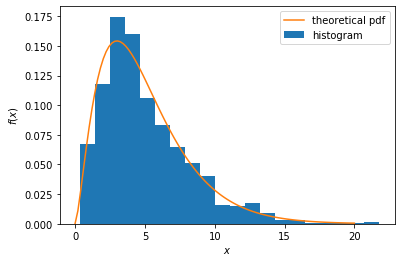

In [2]:
chi_rv = sts.chi2(5)#χ2 распределение с (k = 5)-степенями свободы
sample = chi_rv.rvs(1000)#выборка χ2 объёма 1000
x = np.linspace(0, 20, 100) #выборка из 100 элементов на интервале 0-20
pdf = chi_rv.pdf(x)
visu(x, pdf, sample)

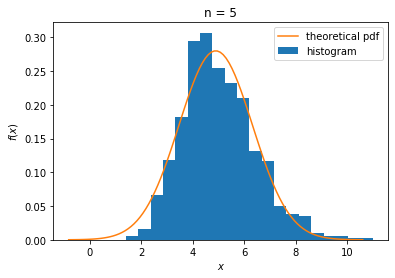

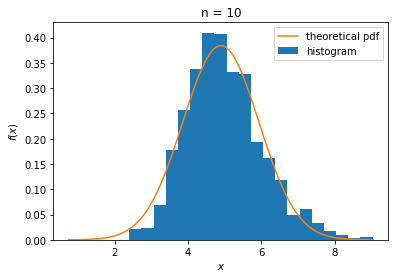

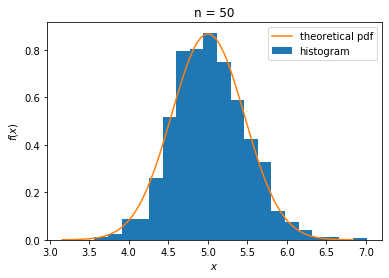

In [3]:
Xn = [5, 10, 50]
flag = True
for n in Xn:
    plt.title("n = %d" % n)
    #1000 выборок объема n:
    array = [chi_rv.rvs(n).mean() for i in range(1000)]
    med = np.median(array)#среднее (медиана)
    var = np.var(array)#дисперсия
    #выборка из 100 элементов на интервале median - 4σ до median + 4σ:
    x = np.linspace(med - 4 * np.sqrt(var), med + 4 * np.sqrt(var), 100)
    norm_rv = sts.norm(med, np.sqrt(var))
    pdf = norm_rv.pdf(x)
    visu(x, pdf, array)

По мере увеличения объема выборки n, распределение стремится к своим средним значениям (f(x) возрастает с ~0.25-0.3 при n = 5 до ~0.8-0.9 при n = 50). При этом падает значение среднеквадратического отклонения, что при увеличении показателя n делает гистограмму более вытянутой и узкой 